In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import os

In [2]:
data = pd.read_csv("F:\\Excelr\\Assignment\\Using R\\PCA\\wine.csv",index_col=0)

In [3]:
data.shape

(178, 13)

In [4]:
data.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
for col in data.columns:
    print(col)

Alcohol
Malic
Ash
Alcalinity
Magnesium
Phenols
Flavanoids
Nonflavanoids
Proanthocyanins
Color
Hue
Dilution
Proline


In [6]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


No handles with labels found to put in legend.


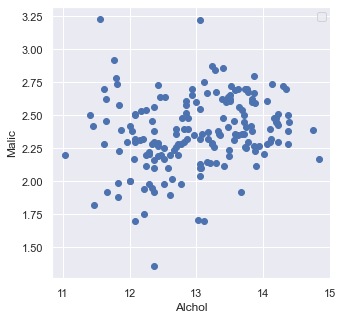

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(data.iloc[:,0],data.iloc[:,2])
plt.xlabel("Alchol")
plt.ylabel("Malic")
plt.legend()
plt.show()


In [15]:
pca = PCA()
pca.fit(data)

PCA()

In [16]:
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [27]:
pca = PCA(n_components =3)


In [28]:
pca.fit(data)

PCA(n_components=3)

In [31]:
pca_tran = pca.transform(data)
print(pca_tran)

[[ 3.18562979e+02  2.14921307e+01  3.13073470e+00]
 [ 3.03097420e+02 -5.36471768e+00  6.82283550e+00]
 [ 4.38061133e+02 -6.53730945e+00 -1.11322298e+00]
 [ 7.33240139e+02  1.92729032e-01 -9.17257016e-01]
 [-1.15714285e+01  1.84899946e+01 -5.54422076e-01]
 [ 7.03231192e+02 -3.32158674e-01  9.49375334e-01]
 [ 5.42971581e+02 -1.35189666e+01  2.12694283e+00]
 [ 5.48401860e+02  1.14494324e+01  4.04924202e-02]
 [ 2.98036863e+02 -8.18015784e+00  3.88097517e+00]
 [ 2.98049553e+02 -7.10154294e+00  1.55845533e+00]
 [ 7.63079712e+02 -8.33431723e+00 -1.88629037e+00]
 [ 5.32943228e+02 -1.42876338e+01  1.30335240e-01]
 [ 5.72834410e+02 -2.10050143e+01  3.72614859e-01]
 [ 4.02925358e+02 -1.61026352e+01  5.67513986e+00]
 [ 8.00053394e+02 -1.21184472e+01  3.04652991e+00]
 [ 5.63245578e+02  2.21482866e+00 -5.25510985e-01]
 [ 5.33379651e+02  1.08048022e+01 -2.47652734e+00]
 [ 3.83317591e+02  8.47741982e+00 -1.98974501e+00]
 [ 9.33118387e+02 -8.35447844e+00 -1.93291276e+00]
 [ 9.84031775e+01  1.43926594e+

In [33]:
wcss =[]
for i in range(1,21):
    kmean_pca = KMeans(n_clusters = i, init='k-means++', random_state= 42)
    kmean_pca.fit(pca_tran)
    wcss.append(kmean_pca.inertia_)

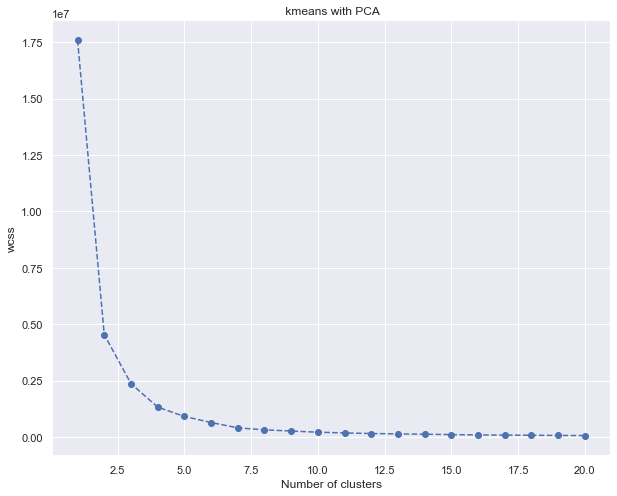

In [34]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker="o",linestyle="--")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title(" kmeans with PCA")
plt.show()

In [36]:
kmens_pca = KMeans(n_clusters =4,init="k-means++",random_state=42)

In [40]:
kmens_pca.fit(pca_tran)

KMeans(n_clusters=4, random_state=42)